# Time Series with Statistics Method: VAR Family

Vector Autoregression (VAR) model captures relationshiop between multiple time series as they change over time. This model could be extended into:

- VAR(p) with only Auto Regressive components
- VARMA(p,q) with Moving Average components
- VARMAX(p,q) with Exogenous Variable

Functions referred to **Time Series Forecasting in Pythin written by Marco Peixeiro (2022)** with several adjustments. All plug-and-play functions could be seen in fun_arma-family.py file. This project would only focus on employing VARMAX to forecast the time series.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

In [2]:
# hide the warning

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [3]:
df = sm.datasets.macrodata.load_pandas().data
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [4]:
# rename index to date time

start_date = 'January 1959'
end_date = 'November 2009'

dt_index = (pd.date_range(pd.to_datetime(start_date), 
                          pd.to_datetime(end_date) + pd.offsets.QuarterBegin(1), freq='Q')
            .to_period('D')
            .strftime('%YQ%q')
            .tolist())

df.index = dt_index
df.sample(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2005Q1,2005.0,1.0,12534.113,8719.0,2170.299,869.204,9189.6,193.800,1357.8,2.69,5.3,295.308,4.15,-1.46
1981Q4,1981.0,4.0,5955.062,3809.3,773.053,590.125,4464.4,94.400,442.7,11.33,8.2,231.157,4.26,7.07
1991Q1,1991.0,1.0,7950.164,5284.4,896.210,806.775,5896.3,135.100,843.2,5.83,6.6,252.643,1.19,4.65
2009Q3,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44
2001Q1,2001.0,1.0,11297.171,7744.3,1882.691,710.403,8296.5,176.400,1114.9,4.39,4.2,284.550,1.82,2.57


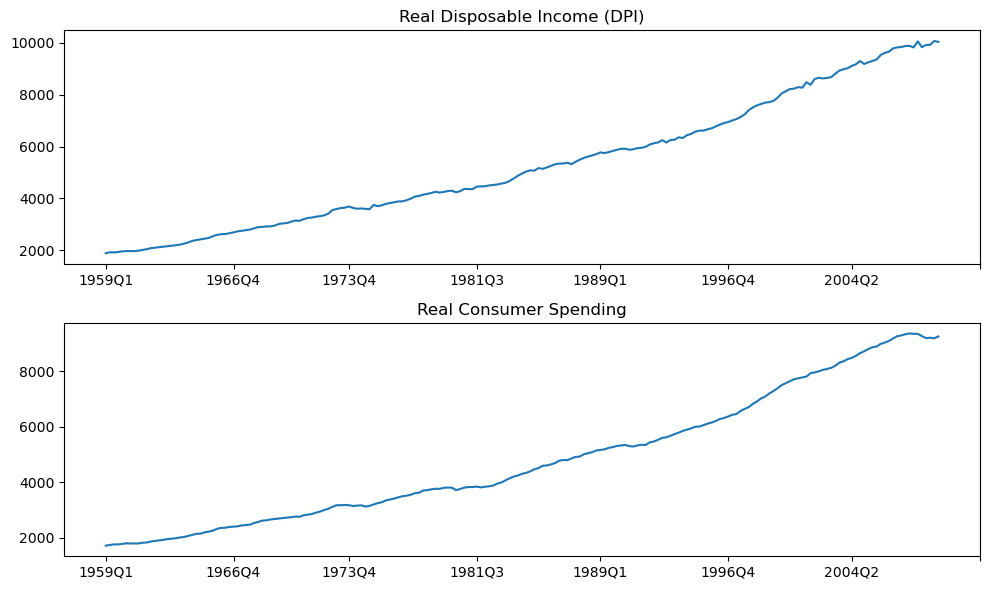

In [5]:
# plot the data 
# our interest data now: real consumption and real dpi

fig, axes = plt.subplots(2, figsize=(10,6))

axes[0].plot(df.index, df['realdpi'])
axes[0].set_title('Real Disposable Income (DPI)')
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())

axes[1].plot(df.index, df['realcons'])
axes[1].set_title('Real Consumer Spending')
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())

fig.tight_layout()

    Reveal the Time Series Components

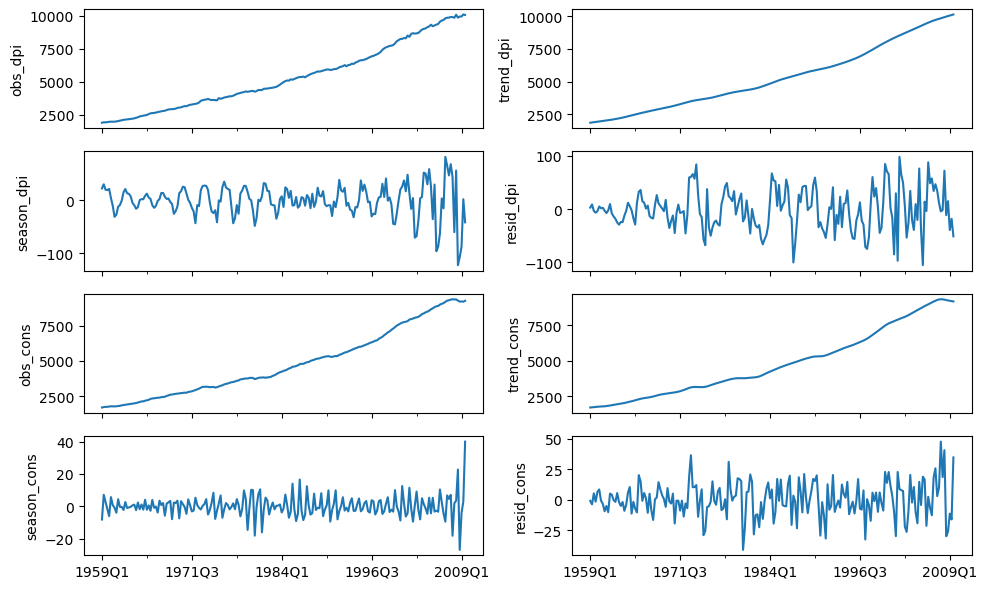

In [6]:
# decomposition for dpi and cons data

fig, axes = plt.subplots(4, 2, figsize=(10,6), sharex=True)
axes = axes.ravel()

decomposition = STL(df['realdpi'], period=12).fit()

decomposition.observed.plot(ax=axes[0], xlabel='', ylabel='obs_dpi')
decomposition.trend.plot(ax=axes[1], xlabel='', ylabel='trend_dpi')
decomposition.seasonal.plot(ax=axes[2], xlabel='', ylabel='season_dpi')
decomposition.resid.plot(ax=axes[3], xlabel='', ylabel='resid_dpi')

decomposition = decomposition = STL(df['realcons'], period=4).fit()

decomposition.observed.plot(ax=axes[4], xlabel='', ylabel='obs_cons')
decomposition.trend.plot(ax=axes[5], xlabel='', ylabel='trend_cons')
decomposition.seasonal.plot(ax=axes[6], xlabel='', ylabel='season_cons')
decomposition.resid.plot(ax=axes[7], xlabel='', ylabel='resid_cons')

plt.tight_layout()

## Step 1: Check the Stationarity of the Data

In [7]:
# stationarity for real DPI

for col in ['realdpi', 'realcons']:

    print(f'ADF statistic for {col}:', adfuller(df[col].dropna())[0])
    print(f'ADF p-value for {col}:', adfuller(df[col].dropna())[1], '\n')

ADF statistic for realdpi: 2.986025351954683
ADF p-value for realdpi: 1.0 

ADF statistic for realcons: 1.5499123380509614
ADF p-value for realcons: 0.9976992503412904 



    > Data is not in stationarity state
- As the p-value is greater than 0.05
- Need transformation, using pd.diff()

In [8]:
for col in ['realdpi', 'realcons']:
    df[f'{col}_diff_1'] = df[col].diff(periods=1)

    print(f'ADF statistic for {col}:', adfuller(df[f'{col}_diff_1'].dropna())[0])
    print(f'ADF p-value for {col}:', adfuller(df[f'{col}_diff_1'].dropna())[1], '\n')

ADF statistic for realdpi: -8.864893340673008
ADF p-value for realdpi: 1.4493606159108096e-14 

ADF statistic for realcons: -4.204306080845248
ADF p-value for realcons: 0.0006479282158627552 



## Step 2: Grid Search, Minimize AIC by Adjusting Parameters

1. Looping the best parameters for the model
2. Fitting the best parameters to the model

In [9]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VARMAX(endog: Union[pd.Series, list],   # difference is here, will pas 2 variables
                    exog: Union[pd.Series, list],    # pass the exogenous variables here
                    order_list: list,                # only pass p and q iteration, without d, check the how-to later
                    ) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = VARMAX(endog,
                           exog,
                           order=(order[0], order[1]),  # again, no d here, different with SARIMAX function
                           simple_differencing=False).fit(disp=False)
        except:
            continue
        
        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['p, q', 'AIC']
    
    # sorting it by the smallest AIC value
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [10]:
# define the variable for x and y

x_set = df.drop(['year', 'quarter', 'realdpi', 'realcons', 'realdpi_diff_1', 'realcons_diff_1'], axis=1)
y_set = df[['realdpi_diff_1', 'realcons_diff_1']]

In [11]:
# train and test split
# train dataset by 80% of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_set, y_set, test_size=0.2, random_state=0, shuffle=False
)

In [79]:
# how to use the function

from itertools import product
import random

ps = range(0, 4, 1)     # define the range of p we want to check
qs = range(0, 4, 1)     # define the range of q we want to check

order_list = list(product(ps, qs))  # pairing all ps values with qs values

# initiating the grid search for SARIMAX

optimize_VARMAX(endog=y_train,
                exog=x_train,
                order_list=order_list,
                )

  0%|          | 0/16 [00:00<?, ?it/s]

,"p, q",AIC
0,"(1, 0)",3094.015733
1,"(2, 0)",3097.824687
2,"(0, 1)",3098.629865
3,"(3, 0)",3099.221077
4,"(1, 1)",3101.414750
5,"(0, 3)",3103.177808
6,"(1, 2)",3105.837553
7,"(2, 1)",3106.324876
8,"(0, 2)",3106.505861
9,"(1, 3)",3106.883220


**Beware:** No VAR model with p, q = 0,0 as we cannot test using the Granger-Causality test

## Step 3: Granger Causality

The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.

1. Looping the best parameters for the model
2. Fitting the best parameters to the model

In [12]:
# we will use where p = 1

from statsmodels.tsa.stattools import grangercausalitytests

print('realdpi causality to realcons')
print('-------------------------------')
granger_1 = grangercausalitytests(y_set.dropna(), 
                                  maxlag=[1]        # pass number of p to max lag
                                  )       

print('\nrealcons causality to realdpi')
print('-------------------------------')
granger_1 = grangercausalitytests(y_set[['realcons_diff_1', 'realdpi_diff_1']].dropna(), 
                                  maxlag=[1]        # pass number of p to max lag
                                  )       

realdpi causality to realcons
-------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=34.8599 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=35.3881 , p=0.0000  , df=1
likelihood ratio test: chi2=32.5962 , p=0.0000  , df=1
parameter F test:         F=34.8599 , p=0.0000  , df_denom=198, df_num=1

realcons causality to realdpi
-------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7368  , p=0.0059  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=7.8540  , p=0.0051  , df=1
likelihood ratio test: chi2=7.7045  , p=0.0055  , df=1
parameter F test:         F=7.7368  , p=0.0059  , df_denom=198, df_num=1


    > In case of VAR, Granger-causality test should influence each other, and vice-versa

## Step 4: Fitting the Model

In [13]:
# we're going to use varmax with p, q = 3, 0
# initially, varmax 1,0 would be better but the residual test is correlated with each other
# thus, would be advisable using another combination of order

from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(endog=y_train,
               exog=x_train,
               order=(3,0),
               simple_differencing=False
               ).fit(disp=False)

model.summary()

Dep. Variable:,"['realdpi_diff_1', 'realcons_diff_1']",No. Observations:,162
Model:,VARX(3),Log Likelihood,-1512.611
,+ intercept,AIC,3099.221
Date:,"Thu, 30 Mar 2023",BIC,3213.462
Time:,16:27:03,HQIC,3145.605
Sample:,01-01-1959,,
,- 04-01-1999,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"nan, nan",Jarque-Bera (JB):,"41.38, 16.36"
Prob(Q):,"nan, nan",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.62, 2.75",Skew:,"0.07, -0.55"


    Diagnose the Model

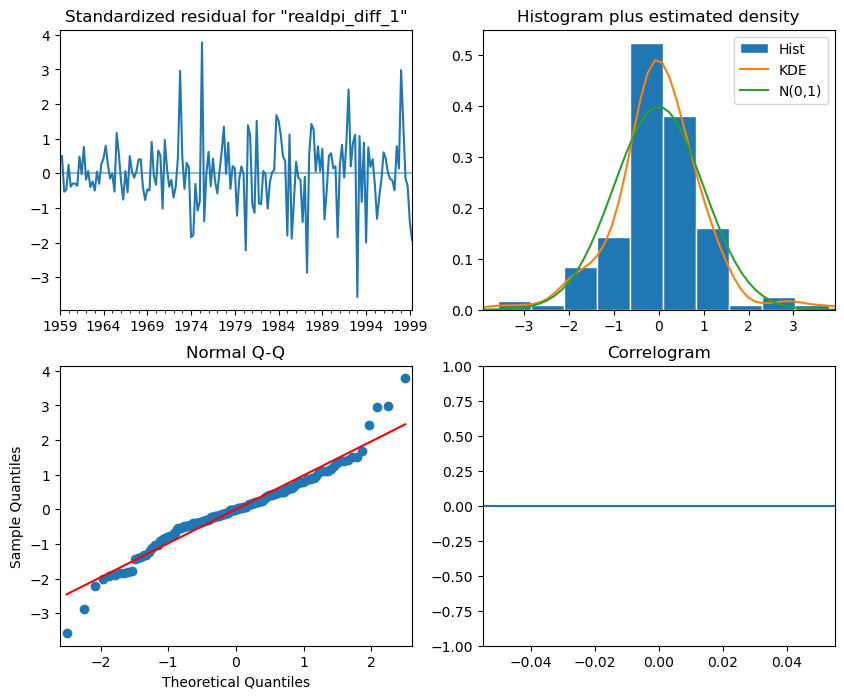

In [14]:
# with the plot, real dpi
model.plot_diagnostics(figsize=(10,8), variable=0, lags=10);

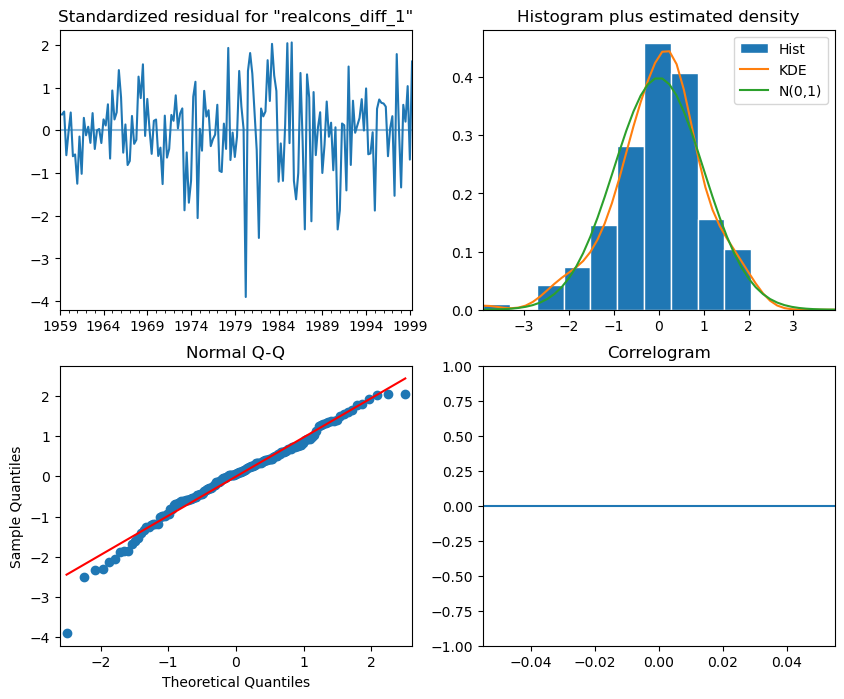

In [15]:
# with the plot, real consumption
model.plot_diagnostics(figsize=(10,8), variable=1, lags=10);

In [16]:
# with the plot

from statsmodels.stats.diagnostic import acorr_ljungbox

model_residuals = model.resid['realdpi_diff_1']  # generate the residuals

print('\nljung-box test for real dpi')
print('-------------------------------')
display(acorr_ljungbox(model_residuals.dropna(), np.arange(1, 11, 1)))  # conducting ljung-box test with 10 lags

print('\nljung-box test for real consumption')
print('-------------------------------')
model_residuals = model.resid['realcons_diff_1']  # generate the residuals
display(acorr_ljungbox(model_residuals.dropna(), np.arange(1, 11, 1)))  # conducting ljung-box test with 10 lags


ljung-box test for real dpi
-------------------------------


,lb_stat,lb_pvalue
1,0.032752,0.856386
2,0.035639,0.982338
3,0.045299,0.997470
4,2.308537,0.679215
5,14.628836,0.012072
6,14.724849,0.022508
7,14.766680,0.039109
8,16.721696,0.033141
9,18.877738,0.026253
10,19.943483,0.029792



ljung-box test for real consumption
-------------------------------


,lb_stat,lb_pvalue
1,0.215682,0.642350
2,0.250669,0.882202
3,0.272244,0.965161
4,2.032504,0.729780
5,2.724286,0.742402
6,3.738511,0.712013
7,3.798921,0.802625
8,6.081539,0.638099
9,6.099456,0.729925
10,6.436211,0.777381


## Step 5: Evaluating the Model

In [17]:
# creating new chunck of code for rolling forecast
# would be injected later to our rolling forecast feature

data_len = len(x_train)
horizon = len(x_test)
window = 4

realdpi_pred_VAR = []
realcons_pred_VAR = []
pred_value_i = []

total_len = data_len + horizon

for i in range(data_len, total_len, window):
    model = VARMAX(endog=y_set[:i],
                   exog=x_set[:i],
                   order=(3,0),
                   simple_differencing=False
                   )
    res = model.fit(disp=False)
    predictions = res.get_prediction(exog=x_set[:i])
    
    # code to get in-sample prediction
    # equivalent to model.fit().predict()

    oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi_diff_1']      # slicing the data from the last, shown by -window:
    oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons_diff_1']    # this one as well

    realdpi_pred_VAR.extend(oos_pred_realdpi)
    realcons_pred_VAR.extend(oos_pred_realcons)
    
    oos_pred_i = y_set.index[i:i + window]  # make the index
    pred_value_i.extend(oos_pred_i)

pd.Series(realdpi_pred_VAR[:len(x_test)], index=pred_value_i)

KeyboardInterrupt: 

In [18]:
# to restore the differenced value to the original value
# diff = 1
# for diff higher than 1, check https://stackoverflow.com/questions/34918013/undo-a-series-diff

def rebuild_diffed(series, first_element_original):
    cumsum = series.cumsum()
    return round((cumsum.fillna(0) + first_element_original), 2)  # round is additional, you can remove it

In [20]:
y_set.iloc[-window:, 0]

2008Q4     82.1
2009Q1      6.0
2009Q2    151.1
2009Q3    -36.9
Name: realdpi_diff_1, dtype: float64

In [79]:
# build the baseline prediction
# using last value
# set the windows at 4, since we're going to predict 4 time steps into the future at a time

import importlib

import fun_arma_family
importlib.reload(fun_arma_family)  # to keep updated, for debugging purpose

realdpi_pred_VAR = fun_arma_family.rolling_forecast(y_set, x_set, data_len=len(y_train), horizon=len(y_test), window=4, method='varmax', kwargs_varmax={'order': (3,0)})[0]
realcons_pred_VAR = fun_arma_family.rolling_forecast(y_set, x_set, data_len=len(y_train), horizon=len(y_test), window=4, method='varmax', kwargs_varmax={'order': (3,0)})[1]

# baseline model using last method
# NO NEED TO differentiate the value

realdpi_pred_last = fun_arma_family.rolling_forecast(df['realdpi'].fillna(0), x_set, data_len=len(y_train), horizon=len(y_test), window=4, method='last')
realcons_pred_last = fun_arma_family.rolling_forecast(df['realcons'].fillna(0), x_set, data_len=len(y_train), horizon=len(y_test), window=4, method='last')

41
41
41
41


In [81]:
# build the prediction data frame

predict_df = pd.DataFrame()
predict_df.index = realdpi_pred_VAR.index

# inject prediction data to the dataframe
# don't forget to restore the differenced value to the original value

predict_df['varmax_dpi'] = rebuild_diffed(pd.Series(realdpi_pred_VAR)[:len(x_test)], df['realdpi'][len(y_train)]).to_list()
predict_df['varmax_cons'] = rebuild_diffed(pd.Series(realcons_pred_VAR)[:len(x_test)], df['realcons'][len(y_train)]).to_list()
predict_df['nlast_dpi'] = realdpi_pred_last
predict_df['nlast_cons'] = realcons_pred_last

predict_df

,varmax_dpi,varmax_cons,nlast_dpi,nlast_cons
1999Q3,7849.64,7373.61,7716.0,7199.9
1999Q4,7917.95,7460.19,7716.0,7199.9
2000Q1,8018.03,7555.59,7716.0,7199.9
2000Q2,8100.93,7647.66,7716.0,7199.9
2000Q3,8217.09,7737.55,8135.9,7571.8
2000Q4,8316.61,7832.24,8135.9,7571.8
2001Q1,8417.05,7932.10,8135.9,7571.8
2001Q2,8510.47,8043.69,8135.9,7571.8
2001Q3,8575.60,8130.51,8273.7,7773.5
2001Q4,8636.69,8214.28,8273.7,7773.5


In [82]:
# merge prediction into the main df
# put it into pred_df

pred_df = df.merge(predict_df, left_index=True, right_index=True, how='outer')
pred_df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,realdpi_diff_1,realcons_diff_1,varmax_dpi,varmax_cons,nlast_dpi,nlast_cons
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,32.8,26.3,NaN,NaN,NaN,NaN
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,-3.3,18.1,NaN,NaN,NaN,NaN
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,14.9,1.9,NaN,NaN,NaN,NaN
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,24.2,16.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,-220.7,-83.3,10436.04,10076.42,10059.0,9351.0
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,82.1,-72.4,10494.27,10112.91,10059.0,9351.0
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,6.0,13.9,10546.03,10136.58,10059.0,9351.0
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,151.1,-20.2,10592.85,10138.57,10059.0,9351.0


    Plotting the Three Forecast

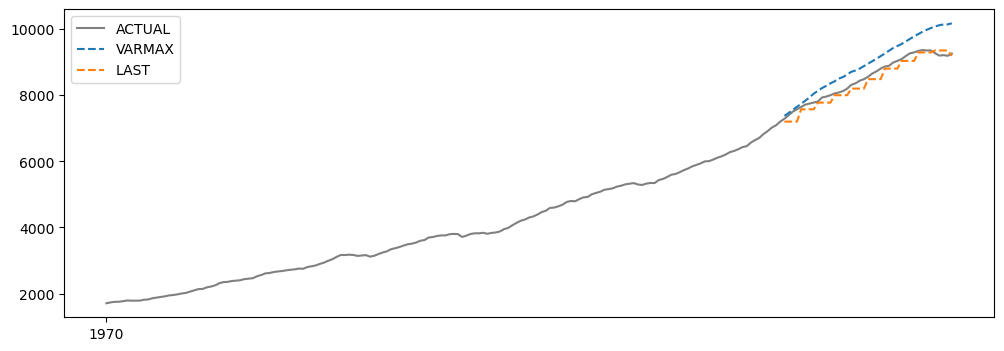

In [83]:
# analyze real consumption first

import matplotlib.dates
from datetime import datetime

fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# set the interval of x axis to every 10 years

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator(base=1)

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

# plotting and displaying the graph

plt.plot(pred_df.index, pred_df['realcons'], color='gray', label="ACTUAL")
plt.plot(pred_df.index, pred_df['varmax_cons'], linestyle='dashed', label="VARMAX")
plt.plot(pred_df.index, pred_df['nlast_cons'], linestyle='dashed', label="LAST")

plt.legend(loc="upper left")
plt.show()

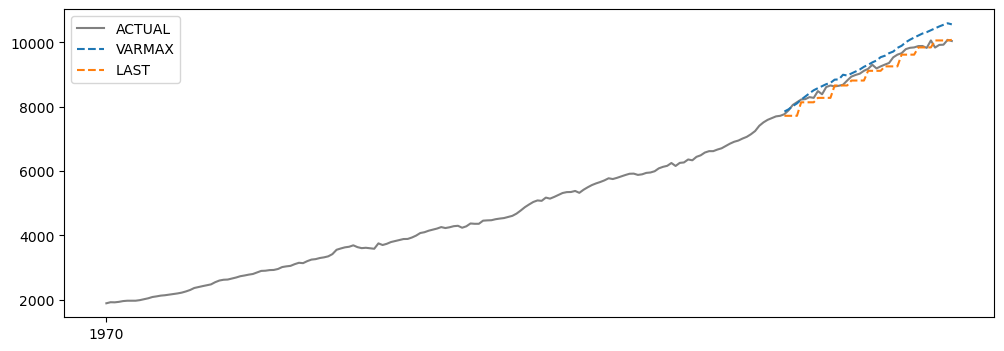

In [84]:
# analyze real dpi after that

import matplotlib.dates
from datetime import datetime

fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# set the interval of x axis to every 10 years

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator(base=10)

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

# plotting and displaying the graph

plt.plot(pred_df.index, pred_df['realdpi'], color='gray', label="ACTUAL")
plt.plot(pred_df.index, pred_df['varmax_dpi'], linestyle='dashed', label="VARMAX")
plt.plot(pred_df.index, pred_df['nlast_dpi'], linestyle='dashed', label="LAST")

plt.legend(loc="upper left")
plt.show()

In [85]:
def mape(y_true, y_pred):
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_realdpi_VAR = mape(pred_df['realdpi'].dropna(), pred_df['varmax_dpi'].dropna()) 
mape_realdpi_last = mape(pred_df['realdpi'].dropna(), pred_df['nlast_dpi'].dropna())

mape_realcons_VAR = mape(pred_df['realcons'].dropna(), pred_df['varmax_cons'].dropna()) 
mape_realcons_last = mape(pred_df['realcons'].dropna(), pred_df['nlast_cons'].dropna())

Text(0, 0.5, 'mape')

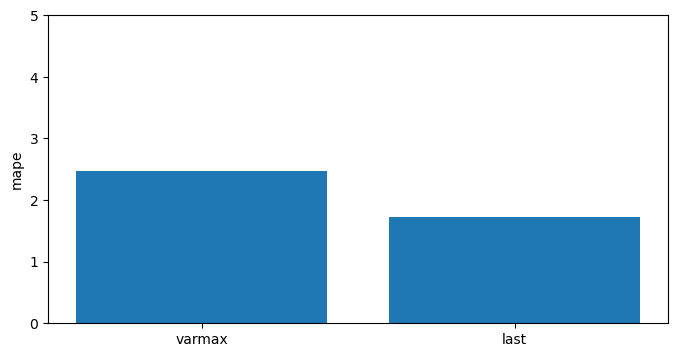

In [93]:
x = ['varmax', 'last']
y = [mape_realdpi_VAR, mape_realdpi_last]

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x, y)
ax.set_ylim(0,5)
ax.set_ylabel('mape')

Text(0, 0.5, 'mape')

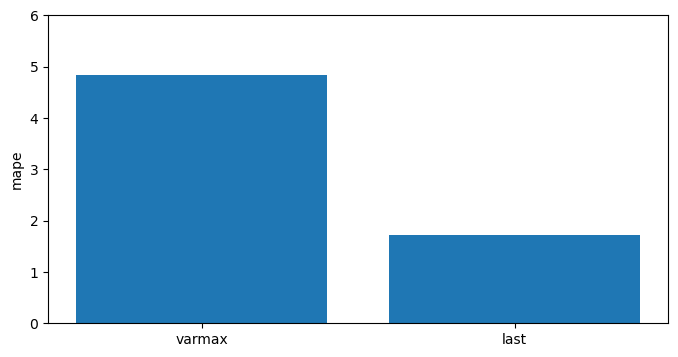

In [94]:
x = ['varmax', 'last']
y = [mape_realcons_VAR, mape_realdpi_last]

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x, y)
ax.set_ylim(0,6)
ax.set_ylabel('mape')